# Jet Basics

This preliminary exercise will illustrate some of the basic properties of jets in CMS. We will use nanoAOD files. For more information about nanoAOD follow [this link](https://gitlab.cern.ch/cms-nanoAOD/nanoaod-doc/-/wikis/home).

## Loading libraries

We will use the [coffea package](https://coffeateam.github.io/coffea) and all the newest pythonic libraries:

In [33]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import hist
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

For this exercise, we will use one file from the $t\bar{t}$ process:

In [3]:
fname = "root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/2520000/47A0D984-2D6F-0D42-B5CB-906786434349.root"
events = NanoEventsFactory.from_root( fname, schemaclass=NanoAODSchema.v6).events()

Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.2 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so


## Plotting

Let's make some basic plots about jets:

In [31]:
hists = (
    hist.Hist.new
    .Reg(50, 0, 500, name="pt")
    .Reg(40, -5, 5, name="eta")
    .Reg(40, -5, 5, name="phi")
    .Reg(20, 0, 100, name="mass")
    .Weight()
    .fill(
        pt=ak.flatten(events.Jet.pt),
        eta=ak.flatten(events.Jet.eta),
        phi=ak.flatten(events.Jet.phi),
        mass=ak.flatten(events.Jet.mass)
    )
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f905e6ad490>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

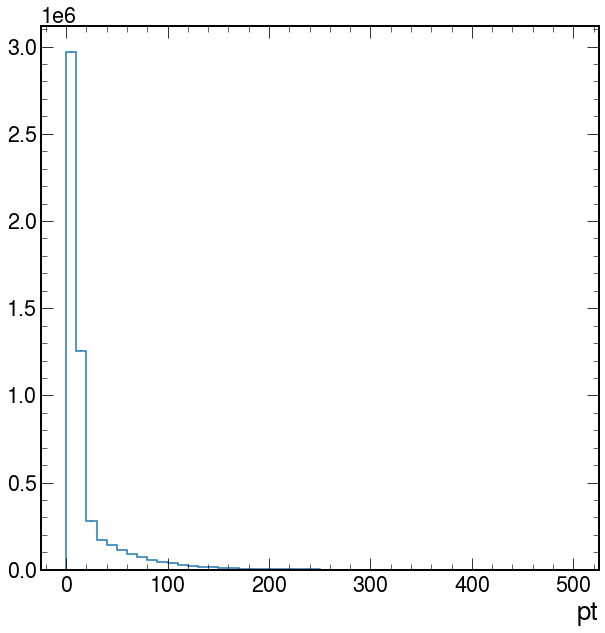

In [26]:
fig, ax = plt.subplots()
hists.project("pt")[::].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f905e5062b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

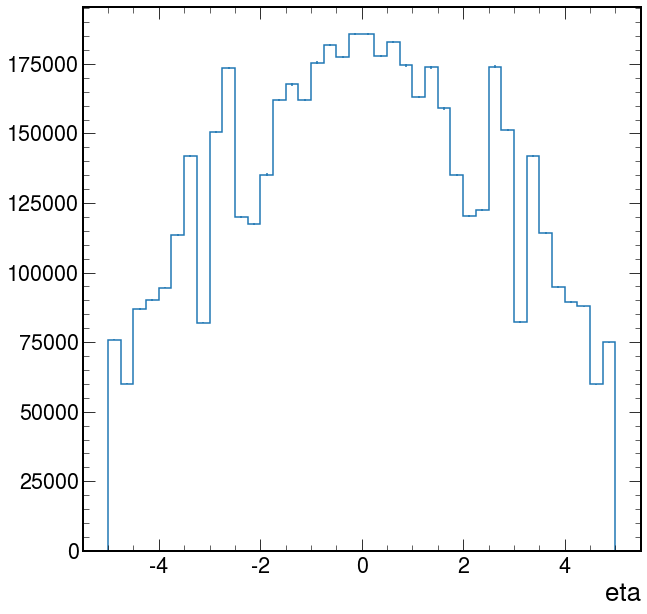

In [27]:
hists.project("eta").plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f905e3707c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

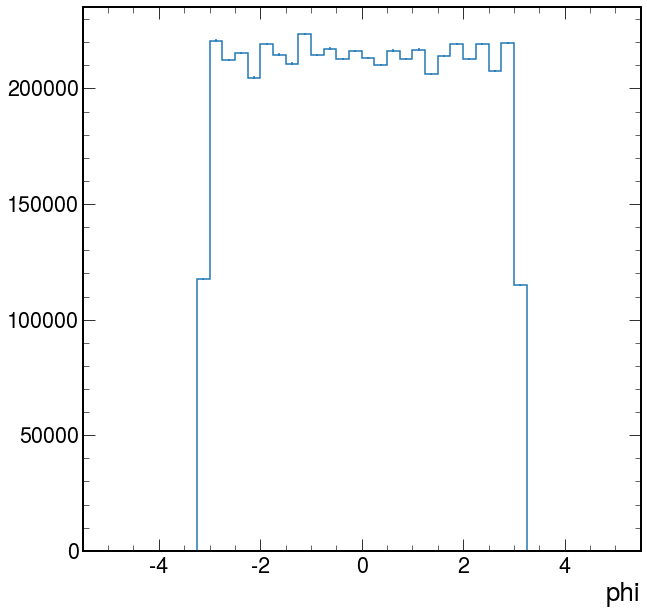

In [28]:
hists.project("phi").plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f905e000a90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

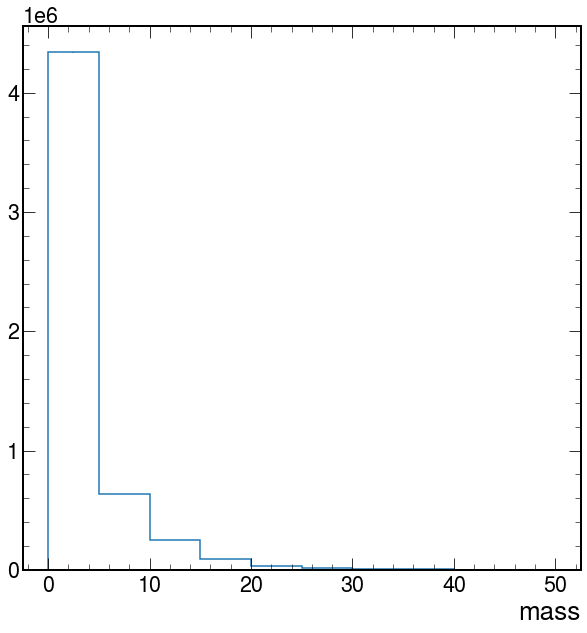

In [32]:
hists.project("mass")[:50j:].plot1d()

## NanoAOD Jet Content

We have two types of jets in nanoAOD: ak4 (Jet) and ak8 jets (FatJet). Let's look at the content of nanoAOD:


In [35]:
events.Jet.fields

['area',
 'btagCSVV2',
 'btagDeepB',
 'btagDeepCvB',
 'btagDeepCvL',
 'btagDeepFlavB',
 'btagDeepFlavCvB',
 'btagDeepFlavCvL',
 'btagDeepFlavG',
 'btagDeepFlavQG',
 'btagDeepFlavUDS',
 'chEmEF',
 'chFPV0EF',
 'chFPV1EF',
 'chFPV2EF',
 'chFPV3EF',
 'chHEF',
 'eta',
 'hfEmEF',
 'hfHEF',
 'hfsigmaEtaEta',
 'hfsigmaPhiPhi',
 'mass',
 'muEF',
 'muonSubtrFactor',
 'neEmEF',
 'neHEF',
 'particleNetAK4_B',
 'particleNetAK4_CvsB',
 'particleNetAK4_CvsL',
 'particleNetAK4_QvsG',
 'particleNetAK4_puIdDisc',
 'phi',
 'pt',
 'puIdDisc',
 'puId_beta',
 'puId_dR2Mean',
 'puId_frac01',
 'puId_frac02',
 'puId_frac03',
 'puId_frac04',
 'puId_jetR',
 'puId_jetRchg',
 'puId_majW',
 'puId_minW',
 'puId_ptD',
 'puId_pull',
 'qgl',
 'qgl_axis2',
 'qgl_ptD',
 'rawFactor',
 'bRegCorr',
 'bRegRes',
 'cRegCorr',
 'cRegRes',
 'electronIdx1',
 'electronIdx2',
 'hfadjacentEtaStripsSize',
 'hfcentralEtaStripSize',
 'jetId',
 'muonIdx1',
 'muonIdx2',
 'nConstChHads',
 'nConstElecs',
 'nConstHFEMs',
 'nConstHFHads',
 

In [36]:
events.FatJet.fields

['area',
 'btagCSVV2',
 'btagDDBvLV2',
 'btagDDCvBV2',
 'btagDDCvLV2',
 'btagDeepB',
 'btagHbb',
 'chEmEF',
 'chHEF',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'hfEmEF',
 'hfHEF',
 'mass',
 'msoftdrop',
 'muEF',
 'n2b1',
 'n3b1',
 'neEmEF',
 'neHEF',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'particleNet_mass',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'nConstChHads',
 'nConstElecs',
 'nConstHFEMs',
 'nConstHFHads',
 'nConstMuons',
 'nCon

## Your turn

You can fill some histograms with the variables from nanoAOD in the cell below: